In [82]:
#loading the necessary library

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [5]:
#saving animal data into pandas dataframe object
animal_data=pd.read_csv("animal_data.csv")


In [6]:
# reading the first five row of the data
animal_data.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [7]:
# reading the last five row of the data
animal_data.tail()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,mammal
97,wasp,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,insect
98,wolf,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
99,worm,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,invertebrate
100,wren,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,False,bird


In [8]:
#doing some data profile to check the object type of each column and check for missing vallue
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   animal    101 non-null    object
 1   hair      101 non-null    bool  
 2   feathers  101 non-null    bool  
 3   eggs      101 non-null    bool  
 4   milk      101 non-null    bool  
 5   airborne  101 non-null    bool  
 6   aquatic   101 non-null    bool  
 7   predator  101 non-null    bool  
 8   toothed   101 non-null    bool  
 9   backbone  101 non-null    bool  
 10  breathes  101 non-null    bool  
 11  venomous  101 non-null    bool  
 12  fins      101 non-null    bool  
 13  legs      101 non-null    int64 
 14  tail      101 non-null    bool  
 15  domestic  101 non-null    bool  
 16  catsize   101 non-null    bool  
 17  type      101 non-null    object
dtypes: bool(15), int64(1), object(2)
memory usage: 4.0+ KB


THE DATA CONTAIN 101 EXAMPLES WITH 18COLUMNS,NO MISSING VALUE WITH MOST COLUMNS DATA TYPE AS BOOLEAN

In [9]:
#dropimg the animal column as this will have no effect in the prediction
animal_data= animal_data.drop("animal",axis=1)

In [18]:
#separating the data into target and feature column
features=animal_data.iloc[:,0:16]
target=animal_data.iloc[:,-1]

In [19]:
#confirming the feature data
features.shape

(101, 16)

In [20]:
features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True


In [21]:
#confirming the target data
target.head()

0    mammal
1    mammal
2      fish
3    mammal
4    mammal
Name: type, dtype: object

In [22]:
target.nunique()

7

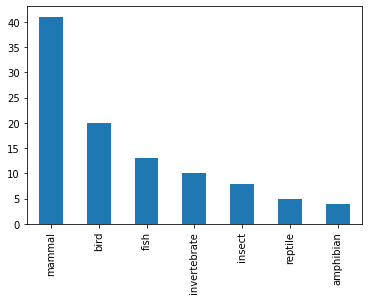

In [29]:
#checking for imbalancedata set

target.value_counts().plot(kind="bar")
plt.show()

THERE IS IMBALANCE IN THE DATA SET BUT THE AIM OF THE EXERCISE IS JUST TO SHOW SKILLS ON RANDOM FOREST CLASSIFIER,THUS ONLY ACCURACY WILL BE USED AS METRIC AND NOT THE RECALL FOR EACH CATEGORY 

In [31]:
#spliting the data into train and test set

features_train,features_test,target_train,target_test=train_test_split(features,target)

In [36]:
# instantiating the randomforestclassifier
rf= RandomForestClassifier(random_state=42,n_estimators=10)

#fit the model
rf.fit(features_train,target_train)

#predict the train data and the test data 
pred_train=rf.predict(features_train)
pred_test=rf.predict(features_test)

#determine the accuracy on both train and test data
print(f"accuracy on the train data is {accuracy_score(pred_train,target_train)}")
print(f"accuracy on the test data is {accuracy_score(pred_test,target_test)}")



accuracy on the train data is 1.0
accuracy on the test data is 0.9230769230769231


THIS IS A GREAT SCORE ON THE TEST DATA,BUT THERE IS AN OVERFIT OF DATA. HAND HYPERPARAMETERS WILL BE USED FOR TUNNING

In [53]:
# instantiating the randomforestclassifier and tuning the n_estimators for better prediction
rf= RandomForestClassifier(random_state=42,n_estimators=10)

#fit the model
rf.fit(features_train,target_train)

#predict the train data and the test data 
pred_train=rf.predict(features_train)
pred_test=rf.predict(features_test)

#determine the accuracy on both train and test data
print(f"accuracy on the train data is {accuracy_score(pred_train,target_train)}")
print(f"accuracy on the test data is {accuracy_score(pred_test,target_test)}")

accuracy on the train data is 1.0
accuracy on the test data is 0.9230769230769231


AFTER SEVERAL TUNING OF THE N_ESTIMATORS,10 SEEMS TO BE THE BEST IN TERMS OF ACCURACY AND RUNTIME BUT MODEL IS STILL OVERFITTING

In [59]:
# instantiating the randomforestclassifier and tuning the max depth
rf= RandomForestClassifier(
    random_state=42,n_estimators=10,max_depth=3)

#fit the model
rf.fit(features_train,target_train)

#predict the train data and the test data 
pred_train=rf.predict(features_train)
pred_test=rf.predict(features_test)

#determine the accuracy on both train and test data
print(f"accuracy on the train data is {accuracy_score(pred_train,target_train)}")
print(f"accuracy on the test data is {accuracy_score(pred_test,target_test)}")

accuracy on the train data is 0.9333333333333333
accuracy on the test data is 0.9615384615384616


THIS IS A BETTER RESULT,LITTLE ERROR AND MODEL IS NO MORE OVERFITTING THE DATA.

In [67]:
# instantiating the randomforestclassifier and tuning the min_samples_leaf
rf= RandomForestClassifier(
    random_state=42,n_estimators=10,max_depth=3,
    min_samples_leaf=2
)

#fit the model
rf.fit(features_train,target_train)

#predict the train data and the test data 
pred_train=rf.predict(features_train)
pred_test=rf.predict(features_test)

#determine the accuracy on both train and test data
print(f"accuracy on the train data is {accuracy_score(pred_train,target_train)}")
print(f"accuracy on the test data is {accuracy_score(pred_test,target_test)}")

accuracy on the train data is 0.9466666666666667
accuracy on the test data is 0.9615384615384616


STILL A BETTER RESULT.

In [76]:
# instantiating the randomforestclassifier and tuning the max_features
rf= RandomForestClassifier(
    random_state=42,n_estimators=10,max_depth=3,
    min_samples_leaf=2,
    max_features="log2"
)

#fit the model
rf.fit(features_train,target_train)

#predict the train data and the test data 
pred_train=rf.predict(features_train)
pred_test=rf.predict(features_test)

#determine the accuracy on both train and test data
print(f"accuracy on the train data is {accuracy_score(pred_train,target_train)}")
print(f"accuracy on the test data is {accuracy_score(pred_test,target_test)}")

accuracy on the train data is 0.9466666666666667
accuracy on the test data is 0.9615384615384616


In [ ]:
AFTER THE FINAL TUNING, I ACHIEVED AN ACCURACY SCORE OF 96% ON THE TEST DATA.

In [84]:
#checking the confusion maxtrix and the classification report

print(confusion_matrix(pred_test,target_test))
print(classification_report(pred_test,target_test))

[[0 0 0 0 0 0 1]
 [0 6 0 0 0 0 0]
 [0 0 7 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

   amphibian       0.00      0.00      0.00         1
        bird       1.00      1.00      1.00         6
        fish       1.00      1.00      1.00         7
      insect       1.00      1.00      1.00         1
invertebrate       1.00      1.00      1.00         1
      mammal       1.00      1.00      1.00         9
     reptile       0.50      1.00      0.67         1

    accuracy                           0.96        26
   macro avg       0.79      0.86      0.81        26
weighted avg       0.94      0.96      0.95        26



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


THE MODEL IS ONLY PERFORMING LESS IN AMPHIBIAN CATEGORY AS IT CLASSIFY THE ONLY AMPHIBAIN AS REPTILE.THIS CAN BE DUE TO THE ABILITY FOR IT NOT TO THE LEARN PATTERN OF AMPHIBIAN CATEGORY BECAUSE OF JUST ONE EXAMPLE PRESENT. 